<a href="https://colab.research.google.com/github/ntuyen610/Practice_with_Python/blob/main/Day_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa

**Librosa:** Thư viện dùng cho phân tích xử lí âm thanh và âm nhạc
- librosa.load: đọc file âm thanh
- librosa.example: tải 1 ví dụ âm thanh từ bộ dữ liệu mẫu của Librosa



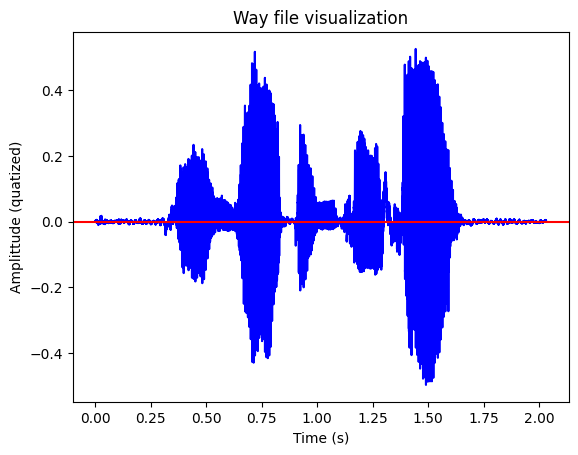

In [7]:
#Visualize âm thanh
import librosa

test_case_1 = "/content/data.wav"
#Load the audio as a waveform 'y'
#Store the sampling rate as sr
audio, sr = librosa.load(test_case_1)

import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0, audio.shape[0] / sr, num = audio.shape[0])
plt.plot(time, audio, color = "blue")
plt.xlabel("Time (s)")
plt.ylabel("Amplittude (quatized)")
plt.title("Way file visualization")
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.show()

**SpeechRecognition:** Thư viện để trích xuất thông tin từ dữ liệu âm thanh
- recognizer.record: ghi âm từ nguồn âm thanh đã chọn => trả về dưới dạng 1 đối tượng
- recognizer.recognize_google: nhận dạng văn bản từ dữ liệu âm thanh dừ audio file bằng cách dùng ***nhận dạng giọng nói của Google***
*Lưu ý: cần kết nối Internet

In [3]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 35.3 MB/s eta 0:00:00


In [8]:
# Chuyển âm thanh thành văn bản
import speech_recognition as sr

r = sr.Recognizer()

my_audio = sr.AudioFile(test_case_1)
with my_audio as source:
  audio = r.record(source)

  print(type(audio))
  your_speech = r.recognize_google(audio, language = "vi-VN")
  print("Audio transcription:", your_speech)

<class 'speech_recognition.audio.AudioData'>
Audio transcription: hiện ra tận phía xa


**gtts:** thư viện Python cho phép bạn tạo ra và phát lại giọng nói từ văn bản sử dụng dịch vụ Text-to-Speech của Google
- lang = "vi" (ngôn ngữ trả về)
- output_filename = "record.mp3" (loại âm thanh đầu ra)
- content = "Hello" (đoạn văn bản muốn chuyển thành voice)

In [9]:
!pip install gtts

In [11]:
from gtts import gTTS
import librosa
import numpy as np

test_case_2 = "Tôi yêu AIO"

lang = "vi"
output_filename = 'record.mp3'
content = test_case_2
output = gTTS(content, lang = lang, slow=False) #text to speech

output.save(output_filename)
data, sr = librosa.load(output_filename) #load google audio using librosa library

import IPython
IPython.display.display(IPython.display.Audio(np.transpose(data), rate =sr)) #display audio
